#  LASSO

- Загрузка данных и разделение на обучающую и тестовую выборки
- Обучение базовой модели LASSO с параметром `alpha=1.0`
- Подбор оптимального параметра `alpha` с помощью GridSearchCV
- Вычисление метрик качества модели: MSE, RMSE, MAE и R²
- Визуализация результатов с использованием диаграммы рассеяния




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train, y_train)


y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Базовая модель LASSO:')
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

coefficients = pd.Series(lasso.coef_, index=feature_names)
print('\nКоэффициенты LASSO модели:')
print(coefficients)

Базовая модель LASSO:
MSE: 3403.575721607074
RMSE: 58.340172450954185
MAE: 49.73032753662261
R2: 0.3575918767219113

Коэффициенты LASSO модели:
age      0.000000
sex     -0.000000
bmi    413.431848
bp      34.830515
s1       0.000000
s2       0.000000
s3      -0.000000
s4       0.000000
s5     258.152894
s6       0.000000
dtype: float64


In [ ]:

param_grid = {'alpha': np.logspace(-4, 0, 50)}
grid_search = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print('\nЛучшее значение alpha:', grid_search.best_params_)


best_lasso = grid_search.best_estimator_
y_pred_best = best_lasso.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print('\nОптимизированная модель LASSO:')
print('MSE:', mse_best)
print('RMSE:', rmse_best)
print('MAE:', mae_best)
print('R2:', r2_best)


Лучшее значение alpha: {'alpha': np.float64(0.07196856730011514)}

Оптимизированная модель LASSO:
MSE: 2801.315405766347
RMSE: 52.92745417801943
MAE: 42.774077271939056
R2: 0.47126553961942086


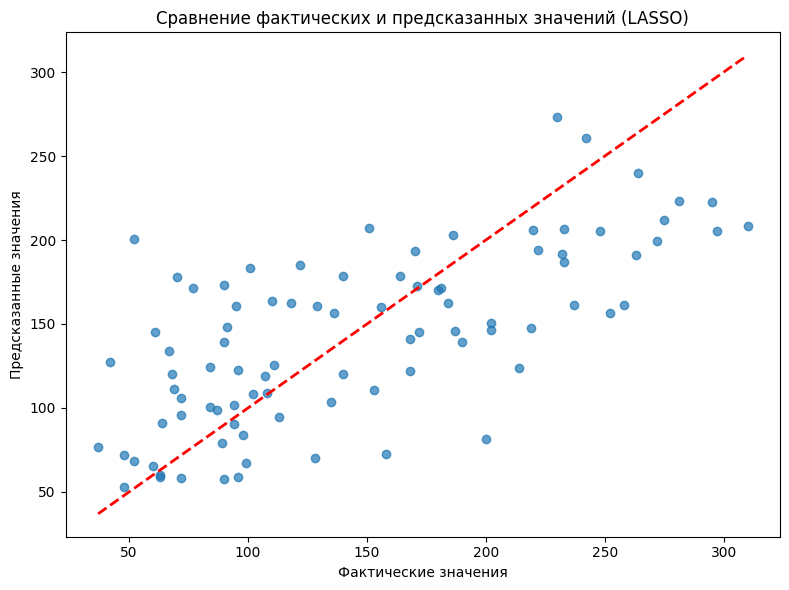

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений (LASSO)')
plt.tight_layout()
plt.show()

## отчет
таким образом можно сказать что LASSO показыввает хужшие результаты чем линейная регрессия и случайный лес (